# **KNN - (K-Nearest Neighbors)**

**KNN** (K-Nearest Neighbors o Vecinos más Cercanos en español) es un algoritmo de aprendizaje supervisado utilizado tanto para problemas de clasificación como de regresión. Es uno de los algoritmos más simples y efectivos en el campo del aprendizaje automático.

La idea principal detrás de KNN es que los objetos que están cerca en el espacio de características tienden a tener etiquetas similares. En otras palabras, se basa en la suposición de que si un conjunto de características es similar al de otros puntos de datos conocidos, la etiqueta de esos puntos de datos será similar. Aquí está cómo funciona en términos generales:

- **Entrenamiento**: Durante la fase de entrenamiento, el algoritmo KNN simplemente almacena todos los puntos de datos y sus etiquetas correspondientes en memoria.

- **Predicción**: Para hacer una predicción para un nuevo punto de datos, el algoritmo busca los "K" puntos de datos más cercanos en el conjunto de entrenamiento según alguna medida de distancia (por ejemplo, distancia euclidiana). "K" es un hiperparámetro que se selecciona antes de ejecutar el algoritmo.

- **Clasificación** (para problemas de clasificación): Si estamos realizando una clasificación, el algoritmo cuenta las etiquetas de los "K" puntos de datos más cercanos y asigna al nuevo punto de datos la etiqueta más común entre ellos.

- **Regresión** (para problemas de regresión): Si estamos realizando una regresión, el algoritmo promedia los valores de destino de los "K" puntos de datos más cercanos y asigna ese valor promedio al nuevo punto de datos.

In [ ]:
#importar las librerias

# Procesamiento de datos
import pandas as pd
import numpy as np

# Visualizacion de datos
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Reduccion de la dimensionalidad
from sklearn.decomposition import PCA

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score

In [ ]:
# Cargar el dataset
df = pd.read_excel('EnfCardiacas.xlsx')

In [ ]:
# Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        150 non-null    int64 
 1   Edad                      150 non-null    int64 
 2   PresionArterial           150 non-null    int64 
 3   NivelColesterol           150 non-null    int64 
 4   FrecuenciaCardiacaReposo  150 non-null    int64 
 5   Mareos                    150 non-null    object
 6   Resultados                150 non-null    object
dtypes: int64(5), object(2)
memory usage: 8.3+ KB


In [ ]:
df

,Id,Edad,PresionArterial,NivelColesterol,FrecuenciaCardiacaReposo,Mareos,Resultados
0,1,45,150,240,138,Si,Enfermedad Cardiaca
1,2,31,110,170,88,No,Paciente Sano
2,3,60,130,215,119,Aveces,Seguimiento
3,4,49,160,245,136,Si,Enfermedad Cardiaca
4,5,49,120,177,94,No,Paciente Sano
...,...,...,...,...,...,...,...
145,146,48,100,150,86,No,Paciente Sano
146,147,40,140,205,111,Aveces,Seguimiento
147,148,53,180,245,150,Si,Enfermedad Cardiaca
148,149,59,100,167,71,No,Paciente Sano


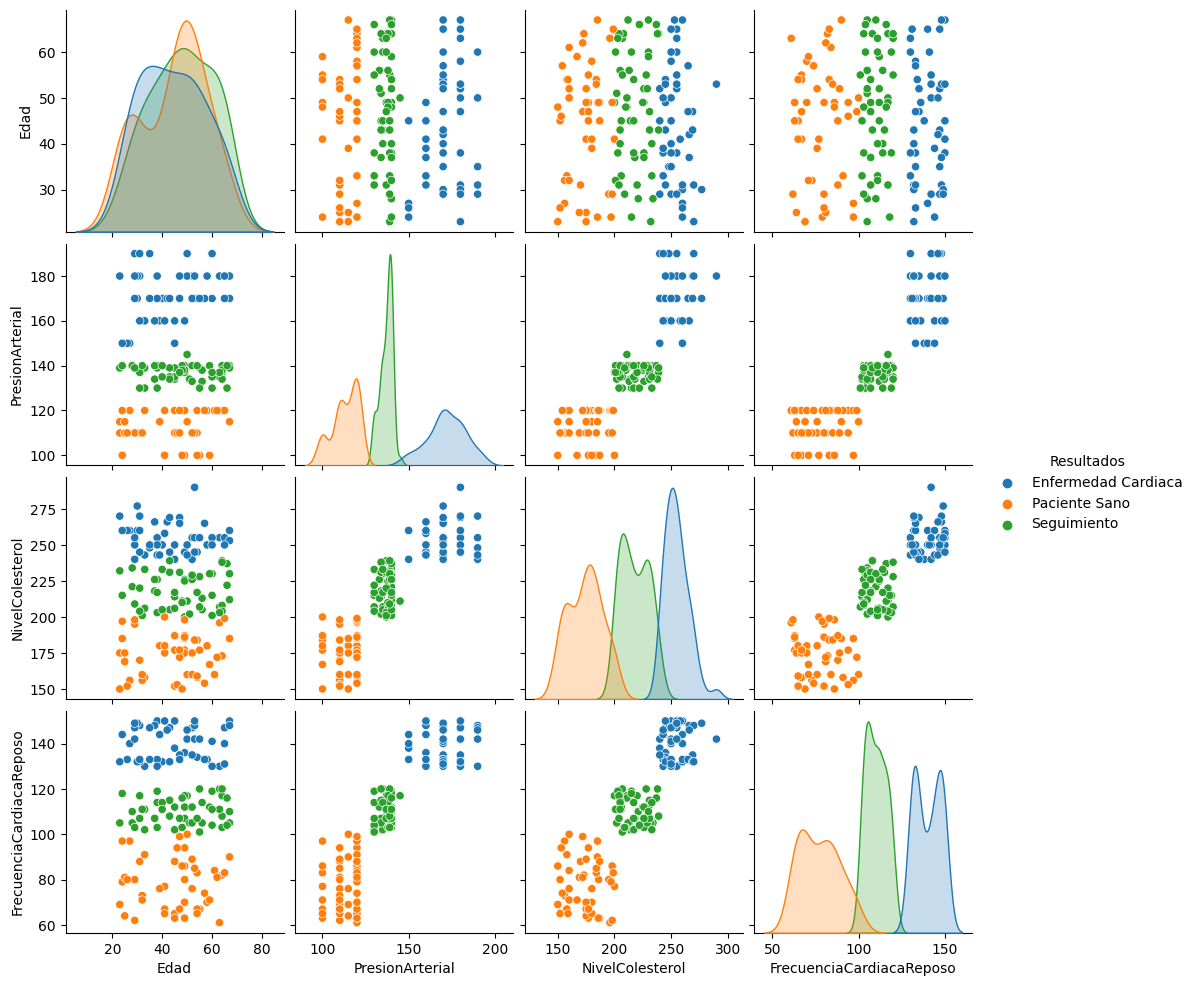

In [ ]:
#Visualizacion de datos
sns.pairplot(df.iloc[:,1:],hue='Resultados')

In [ ]:
# Convertir la columna "Mareos" en valores numéricos (0: No, 1: Aveces, 2: Si)
df['Mareos'] = df['Mareos'].map({'No': 0, 'Aveces': 1, 'Si': 2})

In [ ]:
# Convertir la columna "Resultados" en valores numéricos (0: Paciente Sano, 1: Enfermedad Cardiaca)
df['Resultados'] = df['Resultados'].map({'Paciente Sano': 0, 'Enfermedad Cardiaca': 1, 'Seguimiento': 2})

In [ ]:
df

,Id,Edad,PresionArterial,NivelColesterol,FrecuenciaCardiacaReposo,Mareos,Resultados
0,1,45,150,240,138,2,1
1,2,31,110,170,88,0,0
2,3,60,130,215,119,1,2
3,4,49,160,245,136,2,1
4,5,49,120,177,94,0,0
...,...,...,...,...,...,...,...
145,146,48,100,150,86,0,0
146,147,40,140,205,111,1,2
147,148,53,180,245,150,2,1
148,149,59,100,167,71,0,0


In [ ]:
# Seleccion de variables de entrenamiento y evaluacion
variables = ['Edad', 'PresionArterial',	'NivelColesterol',	'FrecuenciaCardiacaReposo',	'Mareos']

X = df[variables]
y = df['Resultados']

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar las características para normalizarlas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**PCA (Análisis de Componentes Principales, por sus siglas en inglés Principal Component Analysis)** es una técnica de reducción de dimensionalidad que se utiliza en el análisis de datos y el aprendizaje automático. Su objetivo principal es transformar un conjunto de datos multivariado (con múltiples características o dimensiones) en un conjunto de datos de menor dimensionalidad, manteniendo la mayor cantidad posible de la variabilidad original en los datos.

Proceso PCA:
- Centrar los datos.
- Calcular la matriz de covarianza
- Calcular los autovalores y autovectores
- Seleccionar componentes principales
- Proyectar los datos en el nuevo espacio de características

In [ ]:
# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=3)  # Reducir a 3 dimensiones
X_train_pca = pca.fit_transform(X_train)

In [ ]:
# Crear un clasificador KNN con un valor de K específico (por ejemplo, K=3)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [ ]:
# Entrenar el clasificador KNN con el conjunto de entrenamiento
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Realizar predicciones en el conjunto de prueba
X_test_pca = pca.transform(X_test)
y_pred = knn_classifier.predict(X_test)

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 100.00%


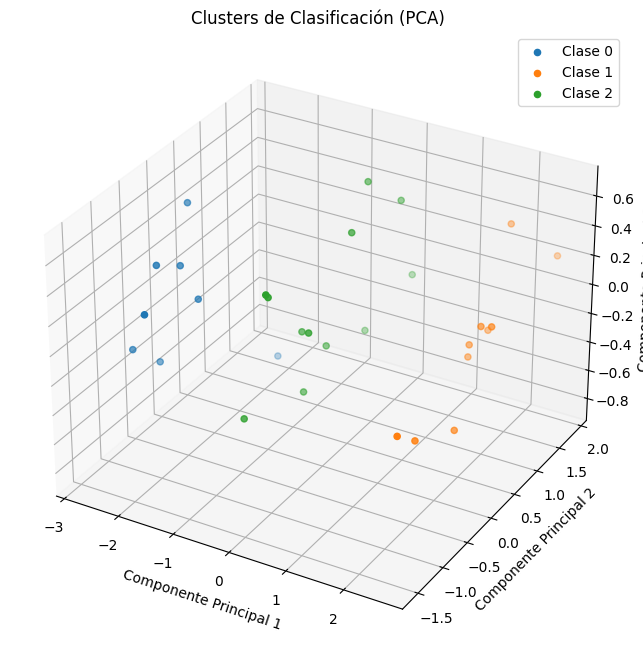

In [ ]:
# Mostrar un gráfico de dispersión de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(X_test_pca[y_test == i][:, 0], X_test_pca[y_test == i][:, 1], X_test_pca[y_test == i][:, 2], label=f'Clase {i}')

ax.set_title('Clusters de Clasificación (PCA)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend(loc='best')

plt.show()

In [ ]:
# Supongamos que tienes datos futuros para un paciente
# 45	150	240	138	Si -> Enfermedad Cardiaca
#nuevo_paciente = np.array([[45, 150, 240, 138, 2]])

# 31	110	170	88	No -> Paciente sano
nuevo_paciente = np.array([[31, 110, 170, 88, 0]])

In [ ]:
# Escalar los datos del nuevo paciente de la misma manera que los datos de entrenamiento
nuevo_paciente = scaler.transform(nuevo_paciente)

# Realizar una predicción para el nuevo paciente utilizando el modelo KNN entrenado
prediccion = knn_classifier.predict(nuevo_paciente)

# Traducir la predicción a la etiqueta correspondiente
if prediccion == 0:
    resultado = 'Paciente Sano'
elif prediccion == 1:
    resultado = 'Enfermedad Cardiaca'
else:
    resultado = 'Seguimiento'

print(f'Predicción para el nuevo paciente: {resultado}')


Predicción para el nuevo paciente: Paciente Sano


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
